<a href="https://colab.research.google.com/github/cbsobral/python/blob/master/topic_choices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
url = (r'/content/drive/My Drive/data/')
corpus_list = PlaintextCorpusReader(url, '.*txt')  # all files ending in 'txt'

file_ids = corpus_list.fileids()

## LDA


### Model

In [ ]:
#!pip install gensim

import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import gensim
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


wordnet = nltk.WordNetLemmatizer()

stoplist = stopwords.words('english')
additional_stopwords = """question impact professor school dissertation paper take following http nuffield
                          title school session study work topics project partner practice happy plan see supervise
                          research thesis issue design student topic supervision university lab mia mpp"""  # define additional stopwords in a string
stoplist += additional_stopwords.split()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def normalize_token(token):
    """
    Convert token to lowercase, and stem using the Porter algorithm.
    """
    return wordnet.lemmatize(token.lower())

def filter_token(token):
    """
    Evaluate whether or not to retain ``token``.
    """
    token = token.lower()
    return token not in stoplist and token.isalpha() and len(token) > 2

In [ ]:
documents=[[normalize_token(token) 
            for token in corpus_list.words(fileids=[fileid])
            if filter_token(token)]
            for fileid in corpus_list.fileids()]

dictionary = gensim.corpora.Dictionary(documents)         
documents_bow = [dictionary.doc2bow(document) for document in documents]

In [ ]:
model = gensim.models.LdaModel(documents_bow, 
                               id2word=dictionary,
                               num_topics=15, 
                               update_every=0,
                               random_state=123,
                               passes=500)

In [ ]:
for i, topic in enumerate(model.print_topics(num_topics=8, num_words=7)):
    print (i, ':', topic)

0 : (0, '0.013*"international" + 0.009*"science" + 0.009*"transparency" + 0.007*"organization" + 0.007*"method" + 0.006*"student" + 0.006*"system"')
1 : (1, '0.016*"policy" + 0.014*"energy" + 0.012*"market" + 0.012*"climate" + 0.012*"electricity" + 0.009*"system" + 0.009*"review"')
2 : (2, '0.013*"country" + 0.012*"policy" + 0.010*"public" + 0.009*"development" + 0.008*"medium" + 0.008*"data" + 0.008*"indicator"')
3 : (3, '0.011*"public" + 0.011*"policy" + 0.010*"innovation" + 0.010*"migration" + 0.010*"law" + 0.009*"lab" + 0.008*"also"')
4 : (4, '0.036*"law" + 0.022*"right" + 0.020*"international" + 0.020*"human" + 0.019*"european" + 0.009*"legal" + 0.008*"governance"')
5 : (5, '0.015*"political" + 0.013*"policy" + 0.012*"analysis" + 0.009*"data" + 0.009*"comparative" + 0.008*"empirical" + 0.008*"politics"')
6 : (6, '0.017*"health" + 0.013*"data" + 0.012*"tax" + 0.012*"policy" + 0.007*"social" + 0.006*"focus" + 0.006*"also"')
7 : (7, '0.030*"public" + 0.016*"policy" + 0.014*"managemen

In [ ]:
documents_lda = model[documents_bow]
#documents_lda[5]  

#for i, topic in enumerate(documents_lda):
#    print(i, topic)

In [ ]:
#for i, file in enumerate(file_ids):
#  print(i, file)

In [ ]:
#from nltk import FreqDist

#for token in documents:
    #fdist = FreqDist(token)
    #print (fdist.most_common(4))

### LDA Vis

In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

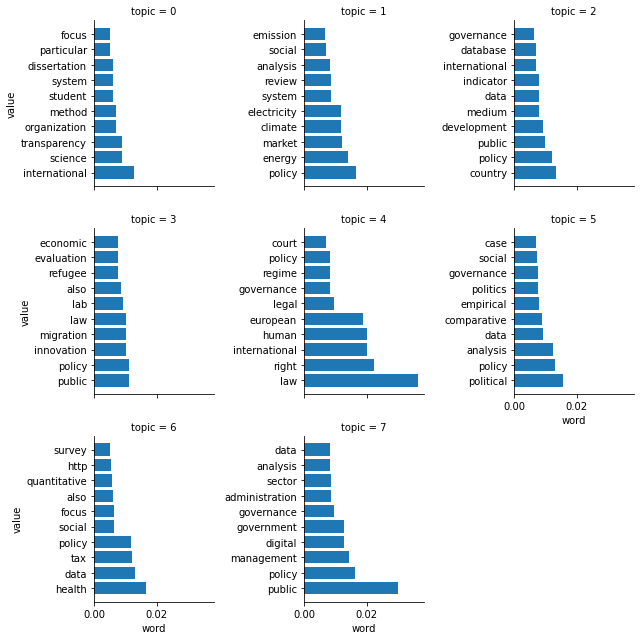

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [ ]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, documents_bow, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.040223  0.029571       1        1  23.268522
6     -0.026441  0.027343       2        1  16.751161
7     -0.008400  0.131264       3        1  15.744916
1      0.180858 -0.064889       4        1  13.329623
2     -0.012957  0.080600       5        1  11.035421
3     -0.069435 -0.054380       6        1   7.579534
0     -0.021138 -0.044262       7        1   6.961252
4     -0.082708 -0.105246       8        1   5.329571, topic_info=               Term       Freq      Total Category  logprob  loglift
519             law  29.000000  29.000000  Default  30.0000  30.0000
150          public  77.000000  77.000000  Default  29.0000  29.0000
89    international  46.000000  46.000000  Default  28.0000  28.0000
1311         health  31.000000  31.000000  Default  27.0000  27.0000
378           right  19.000000  19.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
113          method   2.525644  45.756440   Topic8  -5.3386   0.0351
140       political   2.525642  60.025486   Topic8  -5.3386  -0.2364
770        economic   1.913361  21.411503   Topic8  -5.6162   0.5168
73           hertie   1.913371  21.895874   Topic8  -5.6162   0.4945
497          gender   1.301104   9.857419   Topic8  -6.0018   0.9069

[614 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1842      2  0.826219         academy
202       1  0.097754  accountability
202       3  0.195508  accountability
202       5  0.391016  accountability
202       7  0.097754  accountability
...     ...       ...             ...
437       3  0.134065            year
437       6  0.134065            year
437       7  0.402196            year
1745      5  0.873497             yet
1301      3  0.832694    öffentlichen

[1169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 8, 2, 3, 4, 1, 5])

### LDA Comparison

In [ ]:
#@title Add Text { run: "auto", vertical-output: true }

yr_text = "Family Policy, Health Policy, Education Policy, Social Inequality, Child Outcomes, Poverty 2.\tWhat is your research question?  What are the effects of social inequalities on child outcomes? What are the effects of social inequalities on child development? What are the effects of social inequalities on child well-being? To define the specific question the definition of \"child outcomes\", \"child development\" and child \"well-being\" still need to be defined. 3.\tWhy would you like to explore this topic and question? Please let us know why you are curious about your research topic, and why you think your question(s) are worth exploring. I have always been interested in social policy, especially topics related to Child, Youth, and Family Policies. In the past years, I worked with public education and early childhood development in Brazil. Now, I want to expand my view beyond the education area but still analyze the current situation of marginalized children and teenagers. However, I am still not sure if this will be related to the Brazilian or an International context. " #@param {type:"string"}



In [ ]:
#@title Add Document
path = "/content/drive/My Drive/docs/ana.txt" #@param {type:"string"}
yr_p = open(path)
yr_path = yr_p.read()

In [ ]:
yr_tokens = nltk.word_tokenize(yr_path)
yr_bow_vector = dictionary.doc2bow(yr_tokens)

In [ ]:
# model comparison result
#print(model[yr_bow_vector])

# data frame
results = pd.DataFrame(model[yr_bow_vector])
results.columns = ['topic', 'proximity']
results.sort_values(['proximity'], ascending=False, inplace=True)
print(results.nlargest(3,['proximity']))


   topic  proximity
6     10   0.273963
8     12   0.192127
7     11   0.156723


In [ ]:
# table with documents and topic probability
topics = [model[documents_bow[i]] for i in range(len(documents))]
num_topics = 8

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

#document_topic

In [ ]:
document_topic.sort_values(5, ascending=False)[5].head(10)

8     0.997766
17    0.996927
0     0.996838
7     0.996579
24    0.996274
14    0.995213
22    0.973272
30    0.657838
25    0.568304
13    0.246172
Name: 5, dtype: float64

In [ ]:
topic_dt = pd.DataFrame(documents_lda)
doc_dt = pd.DataFrame(file_ids)
conc = pd.concat([doc_dt, topic_dt], axis=1)
conc.columns = ['doc_id', 'topic1', 'topic2']
conc.sort_values(['topic1'], ascending=True, inplace=True)
conc

,doc_id,topic1,topic2
23,Patz.txt,"(0, 0.9967921)",None
1,Bryson.txt,"(0, 0.99788487)",None
20,Mena.txt,"(1, 0.4181468)","(7, 0.57836205)"
11,Hassel.txt,"(1, 0.99026465)",None
6,Flachsland.txt,"(1, 0.99768275)",None
12,Hirth.txt,"(1, 0.99884796)",None
16,Jankin.txt,"(2, 0.99776053)",None
21,MungiuPippidi.txt,"(2, 0.9987454)",None
27,Snower.txt,"(3, 0.99513483)",None
4,Costello.txt,"(3, 0.99672)",None


## TF-IDF


In [ ]:
from gensim import corpora, models

documents_idf = models.TfidfModel(documents_bow)
corpus_tfidf = documents_idf[documents_bow]

model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=500, workers=4)

In [ ]:
for idx, topic in model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"public" + 0.001*"management" + 0.001*"migration" + 0.001*"digital" + 0.001*"sector" + 0.001*"administration" + 0.001*"http" + 0.001*"government" + 0.001*"refugee" + 0.001*"union"
Topic: 1 Word: 0.002*"health" + 0.001*"law" + 0.001*"climate" + 0.001*"educational" + 0.001*"economic" + 0.001*"education" + 0.001*"labor" + 0.001*"fellow" + 0.001*"ercas" + 0.001*"economics"
Topic: 2 Word: 0.001*"lab" + 0.001*"innovation" + 0.001*"sdg" + 0.001*"labour" + 0.001*"aid" + 0.001*"ministry" + 0.001*"politics" + 0.001*"colomb" + 0.001*"federal" + 0.001*"hightech"
Topic: 3 Word: 0.001*"tax" + 0.001*"corporate" + 0.001*"mair" + 0.001*"organizational" + 0.001*"electoral" + 0.001*"stanford" + 0.001*"business" + 0.001*"former" + 0.001*"inequality" + 0.001*"election"
Topic: 4 Word: 0.001*"law" + 0.001*"electricity" + 0.001*"right" + 0.001*"human" + 0.001*"security" + 0.001*"firm" + 0.001*"international" + 0.001*"medium" + 0.001*"energy" + 0.001*"empirical"


In [ ]:
documents_tfidf = model_tfidf[documents_bow]
documents_tfidf[5]  # 2 = Cali, 5 Dawson

[(0, 0.072317116), (1, 0.9247959)]

### TF_IDF Vis

In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(model_tfidf.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.001404,public,0
1,0.001266,management,0
2,0.001245,migration,0
3,0.001184,digital,0
4,0.001093,sector,0


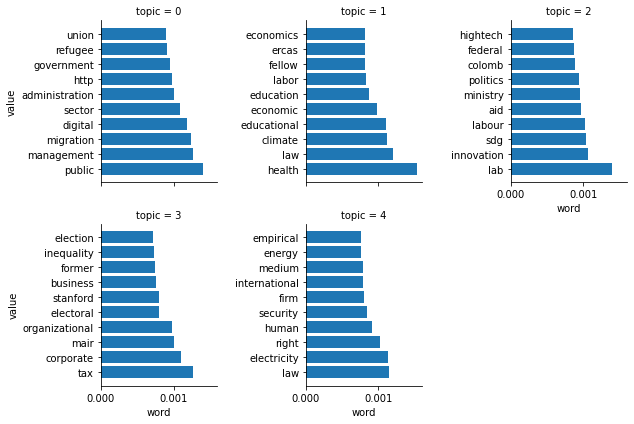

In [ ]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_tfidf, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.007550 -0.000225       1        1  30.057530
4      0.002083 -0.004246       2        1  21.551290
1      0.002070 -0.000180       3        1  19.163700
3      0.001839  0.000964       4        1  14.922963
2      0.001558  0.003686       5        1  14.304517, topic_info=              Term      Freq     Total Category  logprob  loglift
1175           lab  0.000000  0.000000  Default  30.0000  30.0000
1311        health  0.000000  0.000000  Default  29.0000  29.0000
951            tax  0.000000  0.000000  Default  28.0000  28.0000
1928     corporate  0.000000  0.000000  Default  27.0000  27.0000
1729           sdg  0.000000  0.000000  Default  26.0000  26.0000
...            ...       ...       ...      ...      ...      ...
800   policymaking  0.032980  0.144465   Topic5  -7.3007   0.4675
79       indicator  0.034851  0.159922   Topic5  -7.2455   0.4210
1278    regulation  0.034185  0.164079   Topic5  -7.2648   0.3760
150         public  0.038716  0.272791   Topic5  -7.1403  -0.0078
1157    evaluation  0.033163  0.150577   Topic5  -7.2952   0.4316

[231 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

### TF-IDF Comparison


In [ ]:
#@title Add Document{ run: "auto", vertical-output: true }

your_research = "Social Policy  Research topic: Family Policy, Health Policy, Education Policy, Social Inequality, Child Outcomes, Poverty 2.\tWhat is your research question?  What are the effects of social inequalities on child outcomes? What are the effects of social inequalities on child development? What are the effects of social inequalities on child well-being? To define the specific question the definition of \"child outcomes\", \"child development\" and child \"well-being\" still need to be defined. 3.\tWhy would you like to explore this topic and question? Please let us know why you are curious about your research topic, and why you think your question(s) are worth exploring. I have always been interested in social policy, especially topics related to Child, Youth, and Family Policies. In the past years, I worked with public education and early childhood development in Brazil. Now, I want to expand my view beyond the education area but still analyze the current situation of marginalized children and teenagers. However, I am still not sure if this will be related to the Brazilian or an International context. " #@param {type:"string"}



In [ ]:
# pre-process
yr_tokens = nltk.word_tokenize(your_research)
yr_bow_vector = dictionary.doc2bow(yr_tokens)

In [ ]:
print(model_tfidf[yr_bow_vector])

[(0, 0.87860644), (4, 0.10908989)]


In [ ]:
# on a scale X, how much do you think these topics relate to your research topic?
integer_slider = 0 #@param {type:"slider", min:0, max:5, step:1}